# Практическая работа

## Imports

In [1]:
import os
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [2]:
data = dict()
datasets_path = os.path.join(os.getcwd(), 'datasets')
file_names = os.listdir(datasets_path)
for file_name in file_names:
    table_name = file_name.split('.')[0]
    file_path = os.path.join(datasets_path, file_name)
    data[table_name] = pd.read_csv(file_path)
#     print('+'*100)
#     print('Table name', table_name)
#     print('-'*100)
#     display(database[table_name].head())


In [3]:
data.keys()

dict_keys(['D_clients', 'D_close_loan', 'D_job', 'D_last_credit', 'D_loan', 'D_pens', 'D_salary', 'D_target', 'D_work', 'joined_dataset'])

In [4]:
# СОберем информацию о дубликатах и пропусках в одну таблицу

information = {'table_name':[],
               'duplicates':[],
               'null_sum':[],
               'len':[]
              }
for table in data.keys():
    duplicates = data[table].duplicated().sum()
    nulls = data[table].isna().sum().sum()
    information['table_name'].append(table)
    information['duplicates'].append(duplicates)
    information['null_sum'].append(nulls)
    information['len'].append(len(data[table]))

pd.DataFrame(information).set_index('table_name')

,duplicates,null_sum,len
table_name,,,
D_clients,0,0,16000
D_close_loan,0,0,21126
D_job,0,5469,15223
D_last_credit,0,0,15223
D_loan,0,0,21126
D_pens,0,0,2
D_salary,300,0,15523
D_target,0,0,15223
D_work,0,0,3


In [5]:
# ПРоверим долю пропусков по каждому столбцу таблицы D_job
data['D_job'].isna().sum()/len(data['D_job'])

GEN_INDUSTRY    0.089798
GEN_TITLE       0.089798
JOB_DIR         0.089798
WORK_TIME       0.089864
ID_CLIENT       0.000000
dtype: float64

In [6]:
# Посмотрим на таблицу с дубликатами
data['D_salary'].head()

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [7]:
# Посчистаем количество полных дубликатов строк
data['D_salary'].duplicated().sum()

300

In [8]:
# Удалим полные дубликаты, оставив только один
data['D_salary'] = data['D_salary'].drop_duplicates(keep='first')
data['D_salary'].duplicated().sum()

0

In [9]:
data.keys()

dict_keys(['D_clients', 'D_close_loan', 'D_job', 'D_last_credit', 'D_loan', 'D_pens', 'D_salary', 'D_target', 'D_work', 'joined_dataset'])

In [10]:
# Соединим таблицы D_loan и D_close_loan по ключу ID_LOAN
loans = data['D_loan'].merge(data['D_close_loan'], on = 'ID_LOAN', how='left')
loans.head()

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1


In [11]:
# Посчитаем количество кредитов по каждому клиенту
loan_num_total = (loans
                  .groupby(by='ID_CLIENT')['ID_LOAN']
                  .count()
                  .reset_index()
                  .rename(columns={'ID_LOAN': 'LOAN_NUM_TOTAL'})
                 )

loan_num_total.head()

,ID_CLIENT,LOAN_NUM_TOTAL
0,106804370,1
1,106804371,1
2,106804372,2
3,106804373,1
4,106804374,2


In [12]:
# Посчитаем количество закрытых кредитов по каждому клиенту
loan_num_closed = (loans
                   .groupby(by='ID_CLIENT')['CLOSED_FL']
                   .sum()
                   .reset_index()
                   .rename(columns={'CLOSED_FL': 'LOAN_NUM_CLOSED'})
                  )
loan_num_closed.head()

,ID_CLIENT,LOAN_NUM_CLOSED
0,106804370,1
1,106804371,1
2,106804372,1
3,106804373,1
4,106804374,1


In [13]:
# Соберем все таблицы в одну
df = (data['D_clients'].rename(columns={'ID': 'ID_CLIENT'})
      .merge(data['D_job'], on = 'ID_CLIENT', how='left')
      .merge(data['D_last_credit'], on = 'ID_CLIENT', how='left')
      .merge(data['D_salary'], on = 'ID_CLIENT', how='left')
      .merge(data['D_target'], on = 'ID_CLIENT', how='left')
      .merge(loan_num_total, on = 'ID_CLIENT', how='left')
      .merge(loan_num_closed, on = 'ID_CLIENT', how='left')
     )
df.head()

,ID_CLIENT,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,CREDIT,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,5588.0,6.0,1000.0,от 20000 до 50000 руб.,25000.0,60099204.0,1.0,1.0,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,Торговля,Специалист,Участие в основ. деятельности,5.0,19498.0,12.0,0.0,от 10000 до 20000 руб.,10000.0,62244665.0,0.0,1.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,15470.0,3.0,15000.0,от 20000 до 50000 руб.,30000.0,61050759.0,0.0,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,Государственная служба,Специалист,Участие в основ. деятельности,3.0,13960.0,6.0,2500.0,от 20000 до 50000 руб.,25000.0,62079659.0,0.0,1.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,Другие сферы,Специалист,Участие в основ. деятельности,12.0,11890.0,6.0,8000.0,от 10000 до 20000 руб.,15000.0,66583553.0,0.0,2.0,2.0


In [14]:
# Выделим столбцы, которые планируем оставить
columns_to_keep = ['AGREEMENT_RK',
                   'TARGET',
                   'AGE',
                   'SOCSTATUS_WORK_FL',
                   'SOCSTATUS_PENS_FL',
                   'GENDER',
                   'CHILD_TOTAL',
                   'DEPENDANTS',
                   'PERSONAL_INCOME',
                   'LOAN_NUM_TOTAL',
                   'LOAN_NUM_CLOSED',
                  ]

In [15]:
df = df[columns_to_keep]
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,60099204.0,1.0,42,1,0,1,1,0,25000.0,1.0,0.0
1,62244665.0,0.0,28,1,0,1,1,1,10000.0,1.0,0.0
2,61050759.0,0.0,64,1,1,0,2,0,30000.0,1.0,1.0
3,62079659.0,0.0,54,1,0,1,0,0,25000.0,1.0,0.0
4,66583553.0,0.0,26,1,0,0,1,1,15000.0,2.0,2.0


In [16]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,60099204.0,1.0,42,1,0,1,1,0,25000.0,1.0,0.0
1,62244665.0,0.0,28,1,0,1,1,1,10000.0,1.0,0.0
2,61050759.0,0.0,64,1,1,0,2,0,30000.0,1.0,1.0
3,62079659.0,0.0,54,1,0,1,0,0,25000.0,1.0,0.0
4,66583553.0,0.0,26,1,0,0,1,1,15000.0,2.0,2.0


In [17]:
# Сохраним итоговую таблицу в файл
df.to_csv('datasets/joined_dataset.csv', index=False)

**В данной работе оставим минимально необходимые поля для ряботы.**

Однако для исследования и построения предсказательной модели могут иметь влияние еще и следующие поля:

**'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE'** - на основе данных полей можно проверять является ли регион фактического проживания таким же, что и регион регистрации или регион доставки корреспонденции. Также каждый регион может иметь свой коэффициент надежности.

**'FAMILY_INCOME'** - данное поле также важно в модели предсказаний и может иметь значительное влияние, так как оно показывает напрямую доход семьи. На его основе можно также сделать новую фичу, которая будет проверять больше или меньше персональный доход относитель дохода семьи.

**'WORK_TIME'** - время работы на последнем месте работы. Довольно важный признак, который показывает насколько клиент постоянный, если он долго работает на последнем месте работы.

**'MARITAL_STATUS' и 'EDUCATION'** могут имет влияние на предсказания, но его нужно исследовать и тестировать на модели.  


## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

### Построение графиков распределений признаков

In [18]:
# заголовок приложения
st.title('Домашнее задание по прикладному Python')

# df = pd.read_csv('datasets/joined_dataset.csv')

# построение графиков распределений признаков

st.header("1. Построим графики распределения признаков")

2023-12-12 06:27:03.218 
  command:

    streamlit run C:\Users\t.ermeshev\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [19]:
# Сделаем копию для корреляции признаков
df_corr = df.copy()

In [20]:
# Приведем категориальные признаки от чисел к словам
df['GENDER'] = df['GENDER'].apply(lambda x: 'Мужчина' if x == 1 else 'Женщина')
df['GENDER'].value_counts()

df['SOCSTATUS_WORK_FL'] = df['SOCSTATUS_WORK_FL'].apply(lambda x: 'Работает' if x == 1 else 'Не работает')
df['SOCSTATUS_WORK_FL'].value_counts()

df['SOCSTATUS_PENS_FL'] = df['SOCSTATUS_PENS_FL'].apply(lambda x: 'Пенсионер' if x == 1 else 'Не пенсионер')
df['SOCSTATUS_PENS_FL'].value_counts()

df['TARGET'] = df['TARGET'].apply(lambda x: 'Отклик был' if x == 1 else 'Отклика не было')
df['TARGET'].value_counts()

Отклика не было    14188
Отклик был          1812
Name: TARGET, dtype: int64

In [21]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,60099204.0,Отклик был,42,Работает,Не пенсионер,Мужчина,1,0,25000.0,1.0,0.0
1,62244665.0,Отклика не было,28,Работает,Не пенсионер,Мужчина,1,1,10000.0,1.0,0.0
2,61050759.0,Отклика не было,64,Работает,Пенсионер,Женщина,2,0,30000.0,1.0,1.0
3,62079659.0,Отклика не было,54,Работает,Не пенсионер,Мужчина,0,0,25000.0,1.0,0.0
4,66583553.0,Отклика не было,26,Работает,Не пенсионер,Женщина,1,1,15000.0,2.0,2.0


In [22]:
columns = list(df.columns)
columns.remove('AGREEMENT_RK')
columns

['TARGET',
 'AGE',
 'SOCSTATUS_WORK_FL',
 'SOCSTATUS_PENS_FL',
 'GENDER',
 'CHILD_TOTAL',
 'DEPENDANTS',
 'PERSONAL_INCOME',
 'LOAN_NUM_TOTAL',
 'LOAN_NUM_CLOSED']

In [23]:
# Соберем словарь с описанием столбцов, чтобы использовать его в дальнейшем
col_dict = {'AGREEMENT_RK' : 'Уникальный идентификатор объекта в выборке',
            'TARGET' : 'Целевая переменная: отклик на маркетинговую кампанию',
            'AGE' : 'Возраст клиента',
            'SOCSTATUS_WORK_FL' : 'Социальный статус клиента относительно работы',
            'SOCSTATUS_PENS_FL' : 'Социальный статус клиента относительно пенсии',
            'GENDER' : 'Пол клиента',
            'CHILD_TOTAL' : 'Количество детей клиента',
            'DEPENDANTS' : 'Количество иждивенцев клиента',
            'PERSONAL_INCOME' : 'Личный доход клиента (в рублях)',
            'LOAN_NUM_TOTAL' : 'Количество ссуд клиента',
            'LOAN_NUM_CLOSED' : 'Количество погашенных ссуд клиента'
           }

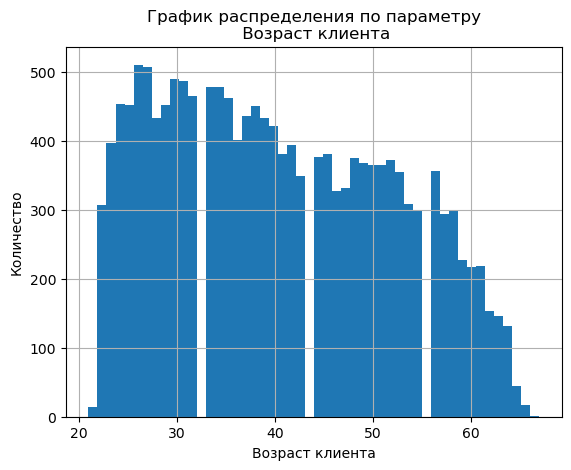

In [24]:
# Построим график распределения по возрасту клиента
fig, ax = plt.subplots()
plt.title('График распределения по параметру\n Возраст клиента')
ax.hist(df['AGE'], bins=50)

ax.set_xlabel('Возраст клиента')
ax.set_ylabel('Количество')
plt.grid('all')

# fig

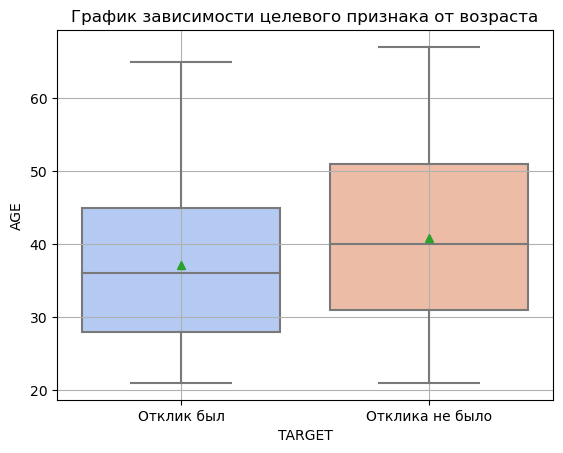

In [25]:
# Построение графика boxplot
st.subheader("Построим график boxplot")

hue_dict = {'None': None,
            'GENDER' : 'Пол клиента',
            'SOCSTATUS_WORK_FL' : 'Социальный статус клиента относительно работы',
            'SOCSTATUS_PENS_FL' : 'Социальный статус клиента относительно пенсии',
           }

hue = st.selectbox(
     'Выберите параметр "hue", по которому хотите посмотреть распределение',
     (hue_dict.keys()))
st.write(f'Вы выбрали: {hue} - {hue_dict[hue]}')

if hue == 'None':
    hue = None

fig, ax = plt.subplots()#figsize=(10, 10))
plt.title('График зависимости целевого признака от возраста')#, fontsize = 20)
ax = sns.boxplot(x="TARGET",
                 y="AGE",
                 hue=hue,
                 data=df,
                 palette="coolwarm",
                 showmeans=True)
plt.grid('all')

# fig

In [26]:
st.write('Посмотрим основные числовые характеристики по возрасту')
round(df['AGE'].describe(), 1)

count    16000.0
mean        40.4
std         11.6
min         21.0
25%         30.0
50%         39.0
75%         50.0
max         67.0
Name: AGE, dtype: float64

In [27]:
st.write('''
На графике видно не нормальное распределение с небольшим хвостом в сторону увеличения возраста, 
поэтому наблюдаем незначительное смещение среднего относительно медианы на боксплоте.

Самый распространенный возраст от 30 до 50 лет
''')

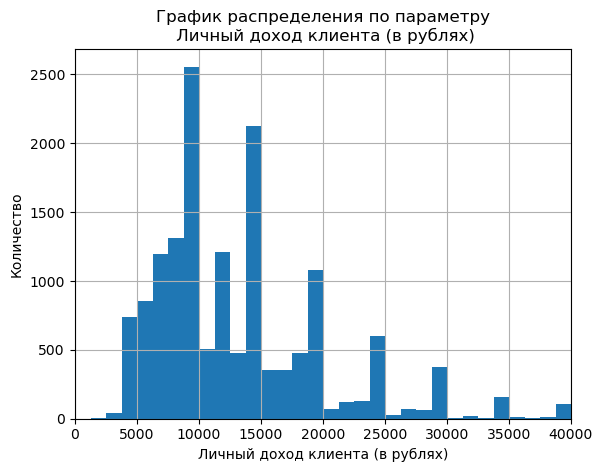

In [28]:
# Построим график распределения по личному доходу клиента
st.subheader("График распределения по параметру Личный доход клиента")


fig, ax = plt.subplots()
plt.title('График распределения по параметру\n Личный доход клиента (в рублях)')
ax.hist(df['PERSONAL_INCOME'], bins=200)

ax.set_xlabel('Личный доход клиента (в рублях)')
ax.set_ylabel('Количество')
ax.set_xlim([0, 40000])
plt.grid('all')

# fig

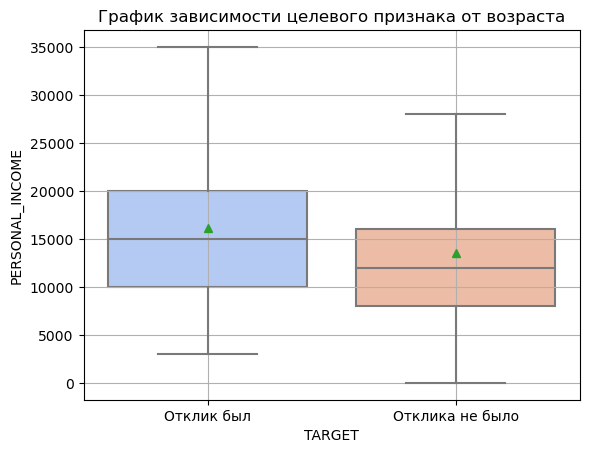

In [29]:
st.subheader("Построим график boxplot")

fig, ax = plt.subplots()#figsize=(10, 10))
plt.title('График зависимости целевого признака от возраста')#, fontsize = 20)
ax = sns.boxplot(x="TARGET",
                 y="PERSONAL_INCOME",
                 hue=hue,
                 data=df,
                 palette="coolwarm",
                 showmeans=True,
                 showfliers=0,
                )
plt.grid('all')

# fig

In [30]:
st.write('Посмотрим основные числовые характеристики по доходу')

round(df['PERSONAL_INCOME'].describe(), 1)

count     15223.0
mean      13853.8
std        9015.5
min          24.0
25%        8000.0
50%       12000.0
75%       17000.0
max      250000.0
Name: PERSONAL_INCOME, dtype: float64

In [31]:
st.write('''
На Графике видно не нормальное распределение с довольно большим хвостом в сторону 
увеличения дохода (на графике он обрезан). В связи с этим видно значительное 
смещение среднего относительно медианы.
Самый распространенный доход от 7000 до 20000 рублей.
При этом есть привязки дохода к числам кратным 5000''')

(0.0, 60000.0)

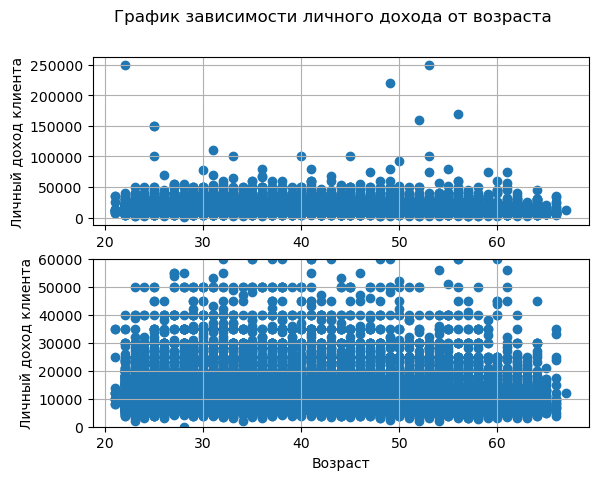

In [32]:
# Построим График зависимости личного дохода от возраста
st.subheader("Построим график boxplot")

fig, ax = plt.subplots(2)#figsize=(10, 10))
plt.suptitle('График зависимости личного дохода от возраста')#, fontsize = 20)

for i in range(2):
    ax[i].scatter(x=df["AGE"], y=df["PERSONAL_INCOME"])    
    ax[i].set_ylabel('Личный доход клиента')
    ax[i].grid('all')
ax[1].set_xlabel('Возраст')
ax[1].set_ylim([0, 60000])

# fig

### Построение матрицы корреляций признаков

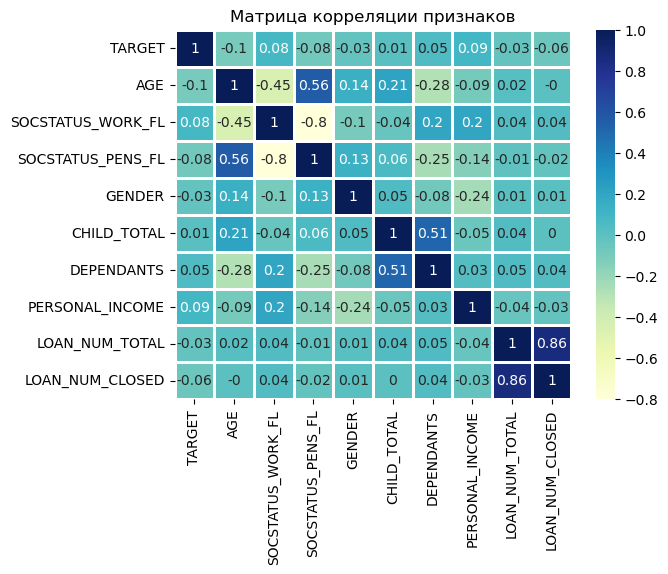

In [33]:
# Построение матрицы корреляций признаков
st.header("2. Построим матрицу корреляций признаков")

crr = round(df_corr[columns].corr(), 2)

fig, ax = plt.subplots()#figsize=(10, 10))
plt.title('Матрица корреляции признаков')#, fontsize = 40)
ax = sns.heatmap(crr,
                 annot = True,
                 cmap="YlGnBu",
                 linecolor='white',
                 linewidths=1,
                 annot_kws={"fontsize":10}
            )
# fig

In [34]:
st.write('''Пары ярковыраженных зависимостей между признаками''')
abs(crr[(crr < 1) & (crr > -1)]).max().sort_values(ascending=False)

LOAN_NUM_TOTAL       0.86
LOAN_NUM_CLOSED      0.86
SOCSTATUS_WORK_FL    0.80
SOCSTATUS_PENS_FL    0.80
AGE                  0.56
CHILD_TOTAL          0.51
DEPENDANTS           0.51
GENDER               0.24
PERSONAL_INCOME      0.24
TARGET               0.10
dtype: float64

In [35]:
st.write('''
1. Наблюдается ярковыраженная зависимость между признаками LOAN_NUM_TOTAL и 
LOAN_NUM_CLOSED что довольно логично - количество выданных кредитов обычно 
коррелирует с количеством закрытых кредитов;\n
2. Наблюдается ярковыраженная обратная зависимость между признаками 
SOCSTATUS_WORK_FL и SOCSTATUS_PENS_FL. Это логично, ведь когда человек выходит
на пенсию, он обычно перестает работать;\n
3. Есть выраженная зависимость количества детей и иждевенцев. Зачастую дети и 
являются иждевенцами. Но так как это не всегда тае, то поэтому зависимость не 
такая сильная;\n
4. Есть выраженная зависимость возраста и пенсионного статуса, и это тоже логично.
''')